In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('../data/weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
a = df.Day[0]
a

Timestamp('2008-01-01 00:00:00')

In [5]:
# ваш код
def year(day):
    return day.year
year(a)

2008

In [6]:
df_ = df
df_['year'] = df['Day'].apply(year)

In [7]:
df_

,Day,t,year
0,2008-01-01,0,2008
1,2008-01-02,-5,2008
2,2008-01-03,-11,2008
3,2008-01-04,-11,2008
4,2008-01-05,-12,2008
...,...,...,...
3280,2016-12-27,1,2016
3281,2016-12-28,-3,2016
3282,2016-12-29,0,2016
3283,2016-12-30,3,2016


In [8]:
res = df_.groupby('year').mean()
res

,t
year,
2008,8.545205
2009,7.610959
2010,7.117808
2011,8.337912
2012,6.980822
2013,8.728767
2014,8.931507
2015,9.079452
2016,7.907104


In [9]:
print("самый теплый год:", res.idxmax()[0])

самый теплый год: 2015


In [10]:
print("самый холодный год:", res.idxmin()[0])

самый холодный год: 2012


**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [11]:
# ваш код
def month(day):
    return day.month
month(a)

1

In [12]:
df_['month'] = df['Day'].apply(month)
df_[df_['month'] == 1]

,Day,t,year,month
0,2008-01-01,0,2008,1
1,2008-01-02,-5,2008,1
2,2008-01-03,-11,2008,1
3,2008-01-04,-11,2008,1
4,2008-01-05,-12,2008,1
...,...,...,...,...
2945,2016-01-27,2,2016,1
2946,2016-01-28,5,2016,1
2947,2016-01-29,1,2016,1
2948,2016-01-30,5,2016,1


In [13]:
result = df_[df_['month'] == 1].groupby('year').apply(lambda x: len(x[x.t >= 0]))
result

year
2008    19
2009    11
2010     0
2011     5
2012     6
2013     5
2014     8
2015    14
2016     5
dtype: int64

In [14]:
result.idxmax()

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [15]:
# ваш код
df_sum = df_[(df_.month == 6) | (df_.month == 7) | (df_.month == 8)]
df_sum

,Day,t,year,month
151,2008-06-01,15,2008,6
152,2008-06-02,17,2008,6
153,2008-06-03,10,2008,6
154,2008-06-04,16,2008,6
155,2008-06-05,20,2008,6
...,...,...,...,...
3158,2016-08-27,22,2016,8
3159,2016-08-28,16,2016,8
3160,2016-08-29,12,2016,8
3161,2016-08-30,14,2016,8


In [16]:
result = df_sum.groupby('year')
result.mean()['t']

year
2008    18.119565
2009    18.728261
2010    22.119565
2011    21.318681
2012    19.086957
2013    21.543478
2014    20.706522
2015    19.032609
2016    19.326087
Name: t, dtype: float64

In [17]:
result.mean()['t'].idxmin()

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [18]:
# ваш код
diff_ = df['t'].diff()
diff_ = abs(diff_)
df.Day[diff_.idxmax()]

Timestamp('2014-05-27 00:00:00')

**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

Text(0, 0.5, 'средняя температура')

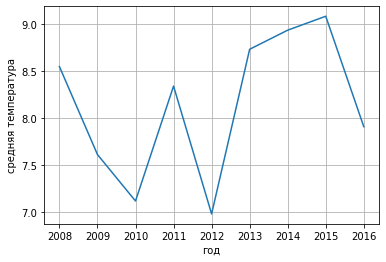

In [19]:
# ваш код
fig, ax = plt.subplots()

ax.plot(df.groupby('year').mean()['t'])
ax.grid()

ax.set_xlabel('год')
ax.set_ylabel('средняя температура')